### TALA TCHONLLA ABRAHAM MIGUEL

## EXERCICE 1

### IMPORTATION DES LIBRAIRIES

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [5]:
housing = fetch_california_housing(as_frame=True)
Data, Target = housing.data, housing.target

## 1.1

In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
target = pd.Series(housing.target, name="Target")

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## 1.2

In [12]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# 1.3

In [15]:
target *= 100
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: Target, dtype: float64

# 1.4

### Problème de régression car la variable cible (target) est continue

# 1.5

### 1.5.1

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

### 1.5.2

In [25]:
regressor = DecisionTreeRegressor(random_state=0)

### 1.5.3

In [28]:
from sklearn.metrics import mean_absolute_error

### 1.5.4

In [32]:
regressor.fit(data, target)
target_predicted = regressor.predict(data)

### 2.5.5

In [38]:
score = mean_absolute_error(target, target_predicted)
print(f"Erreur absolue moyenne : {score:.2f}")

Erreur absolue moyenne : 0.00


# 2.6

## 2.6.1

In [47]:
from sklearn.model_selection import train_test_split

# Supposons que tu as déjà X et y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 2.6.2

In [46]:
# Supposons que tu as un DataFrame `df`
# et que la cible est booking_status

X = data.drop(columns='HouseAge')
y = data['HouseAge']

# One-hot encoding des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Split des données
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entraînement du modèle
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Score entraînement :", train_score)
print("Score test :", test_score)

# Cross-validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    model,
    X,
    y,
    cv=10,
    return_train_score=True,
    scoring='accuracy'
)

print("Train scores (10 folds) :", cv_results['train_score'])
print("Test scores (10 folds) :", cv_results['test_score'])

print("Moyenne train :", np.mean(cv_results['train_score']))
print("Moyenne test :", np.mean(cv_results['test_score']))

Score entraînement : 1.0
Score test : 0.11385658914728682


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Train scores (10 folds) : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test scores (10 folds) : [0.08866279 0.08624031 0.04554264 0.05910853 0.04312016 0.03246124
 0.05717054 0.07655039 0.0499031  0.03343023]
Moyenne train : 1.0
Moyenne test : 0.057218992248062005


## 2.6.3

In [58]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    model,
    X,
    y,
    cv=10,
    return_train_score=True,
    scoring='accuracy'
)

# Récupération des scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

print("Train scores (par split) :", train_scores)
print("Test scores (par split)  :", test_scores)

print("Moyenne des scores d'entraînement :", train_scores.mean())
print("Moyenne des scores de test :", test_scores.mean())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Train scores (par split) : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test scores (par split)  : [0.08866279 0.08624031 0.04554264 0.05910853 0.04312016 0.03246124
 0.05717054 0.07655039 0.0499031  0.03343023]
Moyenne des scores d'entraînement : 1.0
Moyenne des scores de test : 0.057218992248062005


# 2.7

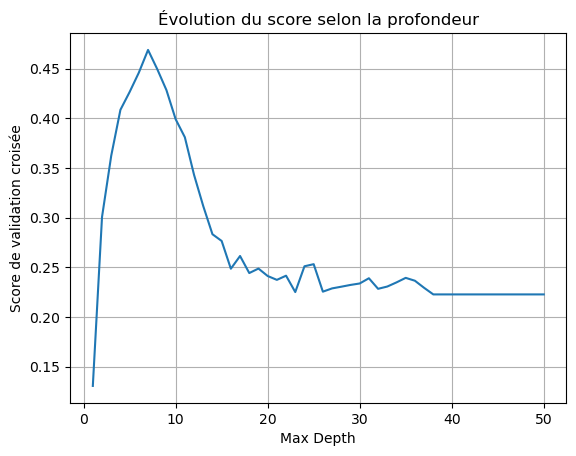

Meilleure profondeur : 7


In [59]:
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

MD = np.arange(1, 51)
scores = [cross_val_score(DecisionTreeRegressor(max_depth=d, random_state=0),
                          data, target, cv=10).mean() for d in MD]

plt.plot(MD, scores)
plt.xlabel("Max Depth")
plt.ylabel("Score de validation croisée")
plt.title("Évolution du score selon la profondeur")
plt.grid()
plt.show()

best_depth = MD[np.argmax(scores)]
print(f"Meilleure profondeur : {best_depth}")

# EXERCICE 2

# 2.0

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 2.1

In [64]:
Hotel = pd.read_csv("Hotel Reservations.csv")
Hotel.drop('Booking_ID', axis = 1, inplace=True)
Hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# 2.2

In [66]:
print(Hotel.info())
print(Hotel.describe())
print(Hotel['booking_status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

# 2.3

In [78]:
# Afficher les noms de colonnes
print("Colonnes disponibles :", Hotel.columns)

# Nombre de features (supposons que la dernière colonne soit la variable cible)
nb_features = Hotel.shape[1] - 1  # On soustrait 1 pour la colonne cible
print("Nombre de features :", nb_features)


Colonnes disponibles : Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')
Nombre de features : 17


# 2.4

In [ ]:
from sklearn.model_selection import train_test_split

numeric_columns = Hotel.select_dtypes(include=['number']).columns

# Affichage des colonnes numériques
print("Colonnes numériques :", list(numeric_columns))
print("Nombre de colonnes numériques :", len(numeric_columns))

# 2.5

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Définir les colonnes numériques
numeric_features = Hotel.select_dtypes(include=['number']).columns

# Définir la variable cible
target_column = "booking_status"  # Cible : annulé ou non

# Séparer X et y
X_num = Hotel[numeric_features]
y = Hotel[target_column]

# Créer le pipeline
pipeline_numeric = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Évaluer avec validation croisée (10 splits)
cv_results = cross_validate(pipeline_numeric, X_num, y, cv=10, scoring='accuracy')

# Afficher le score moyen
print("Score de précision moyen :", cv_results['test_score'].mean())

Score de précision moyen : 0.784782953646986


# 2.6

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
# Charger les données
df = pd.read_csv("Hotel Reservations.csv")

# Définir la variable cible
target_column = "booking_status"

# Sélectionner les colonnes catégorielles (non numériques)
categorical_features = df.select_dtypes(include=['object']).drop(columns=[target_column]).columns
X_cat = df[categorical_features]
y = df[target_column]

# Créer un pipeline avec OneHotEncoder + LogisticRegression
pipeline_categorical = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Évaluer le pipeline avec validation croisée (10-fold)
cv_results_cat = cross_validate(pipeline_categorical, X_cat, y, cv=10, scoring='accuracy')

# Afficher le score moyen
print("Score de précision moyen (catégorielles uniquement) :", cv_results_cat['test_score'].mean())

Score de précision moyen (catégorielles uniquement) : 0.6769666904683087


# 2.7

In [86]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = Hotel.drop(columns=["booking_status"])  # 'Booking_ID' est un identifiant inutile
y = Hotel["booking_status"]

# 3. Identifier les colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 4. Définir le préprocesseur avec StandardScaler pour les numériques et OneHotEncoder pour les catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# 5. Construire le pipeline complet
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# 6. Appliquer la validation croisée à 10 folds
cv_results = cross_validate(pipeline, X, y, cv=10, scoring="accuracy")

# 7. Afficher le score moyen
mean_accuracy = np.mean(cv_results["test_score"])
print(f"Score de précision moyen (10-fold CV) : {mean_accuracy:.4f}")

Score de précision moyen (10-fold CV) : 0.9037


# EXERCICE 3

## 3.1

### C’est un problème de régression, car on cherche à prédire une valeur continue : le prix d’un laptop.

## 3.2

In [93]:
laptops = pd.read_csv("laptops.csv")
X = laptops.drop(columns=["Price"])  # price = variable cible
print("Nombre de features :", X.shape[1])

Nombre de features : 21


## 3.3

In [96]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor, BayesianRidge, ARDRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate
import pandas as pd

# 1. Charger les données

X = laptops.drop(columns=["Price"])
y = laptops["Price"]

# 2. Définir colonnes numériques et catégorielles
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include='object').columns

# 3. Préprocesseur
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# 4. Liste des modèles
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "HuberRegressor": HuberRegressor(),
    "BayesianRidge": BayesianRidge(),
    "ARDRegression": ARDRegression()
}

# 5. Entraîner et valider chaque modèle
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model)])
    cv = cross_validate(pipe, X, y, cv=10, scoring="r2", return_train_score=True)
    results.append({
        "Modèle": name,
        "Train Score Moyen": cv["train_score"].mean(),
        "Test Score Moyen": cv["test_score"].mean()
    })

# 6. Afficher les résultats dans un tableau
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Test Score Moyen", ascending=False))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3860401034.450256, tolerance: 300700746.21078146
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3940702768.0508265, tolerance: 293573928.61988634
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5287204201.112312, tolerance: 311247885.84362465
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_desc

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_bayes.py", line 296, in fit
    X, y = self._validate_data(X, y, dtype=[np.float64, np.float32], y_numeric=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 963, in check_array
    array = _ensure_sparse_format(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 595, in _ensure_sparse_format
    raise TypeError(
TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
